# 🎲 Rolling Dice Normal Distribution

In Lecture 4, we plotted a series of samples taken when summing two six sided dice together. In this Colab Notebook, we will explore the relationship between sample and population normal distributions.


## Let's get started! 😀

In [96]:
import pandas as pd
import io
import scipy as sc
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In the following cell, all of the sum of the dice rolls has been entered as "data".
From there, the average and standard deviation are calculated and will print after running the code.

In [189]:
data=[2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,12,12]
data = pd.DataFrame(data)
sum_of_rolls=data[0]
average=sum_of_rolls.mean()
standard_deviation=sum_of_rolls.std()
print('The sample average is {:3.4f} with a standard deviation of {:3.4f}.'.format(average, standard_deviation))

The sample average is 7.3038 with a standard deviation of 2.4670.


In the next cell, a histogram will be generated which shows the number of observations of each sum of two dice.

`n_bins` has been set to be the number of different sums we expect. For adding together two six-sided dice, we expect 11 different possibilities (2,3,4,5,6,7,8,9,10,11, and 12).

Text(0, 0.5, 'Number of Observations')

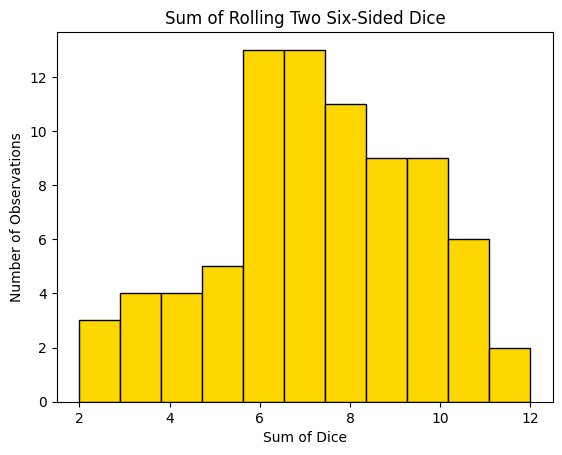

In [191]:
n_bins=11
plt.hist(sum_of_rolls, bins=n_bins, color = "gold", edgecolor='black') #Orville Redenbacher Unpopped Data
plt.title("Sum of Rolling Two Six-Sided Dice")
plt.xlabel("Sum of Dice")
plt.ylabel("Number of Observations")

Next, we can plot the normal distribution on top of the histogram (with a red line), by assuming the sample average and standard deviation are equal to the population average and standard deviation.

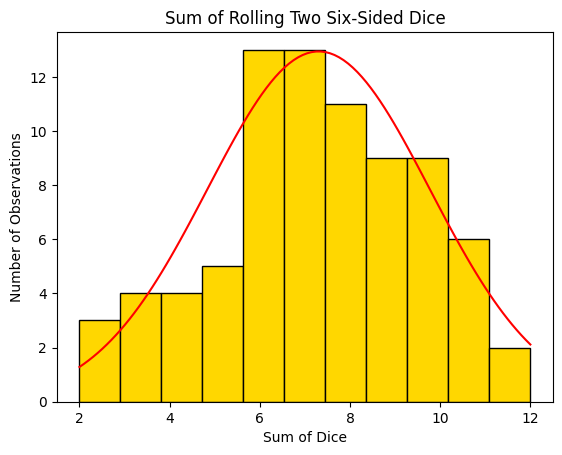

In [197]:
x=np.linspace(sum_of_rolls.min(),sum_of_rolls.max(),100)
normal_distribution= 80*1.0/(standard_deviation*(np.sqrt(2*np.pi)))*np.exp((-0.5*((x-average)/(standard_deviation))**2))
n_bins=11
plt.hist(sum_of_rolls, bins=n_bins, color = "gold", edgecolor='black') #Orville Redenbacher Unpopped Data
plt.title("Sum of Rolling Two Six-Sided Dice")
plt.xlabel("Sum of Dice")
plt.ylabel("Number of Observations")
plt.plot(x,normal_distribution,'r')

For taking the sum of rolling dice, we actually know what the average and standard deviation of the population should be, using the following equations.

<font color='blue'>$$\text{Population Average}=\mu=n\times\left(\frac{y+1}{2}\right)$$

<font color='blue'>$$\text{Population Standard Deviation}=\sigma=\sqrt{n\times\left(\frac{(y+1)(2y+1)}{6}-\left(\frac{y+1}{2}\right)^2\right)}$$

<font color='blue'> Where $y$ is the number of sides on the dice and $n$ is the number of dice that are being summed together. For example, in this example we summed together 2 six-sided dice, so, `y=6` and `n=2`.

The following cell, will calculate the theoretical average and standard devation of the population.

In [182]:
y=6 #type of dice (6=six-sided dice)
n=2 #number of dice being rolled

theoretical_average=((y+1)/2)*n
theoretical_standard_deviation=np.sqrt(n*(((y+1)*(2*y+1)/6)-((y+1)/2)**2))
print('The theoretical population average is {:3.4f} with a standard deviation of {:3.4f}.'.format(theoretical_average, theoretical_standard_deviation))

The theoretical population average is 7.0000 with a standard deviation of 2.4152.


This next cell will plot the theoretical population normal distribution (in blue) over our histogram and sample normal distribution.

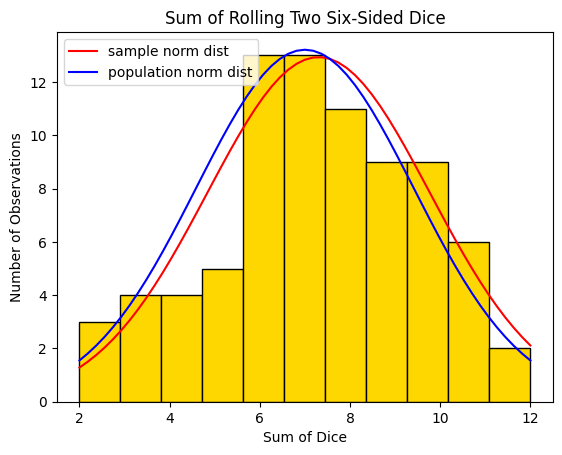

In [198]:
x=np.linspace(2,12,55)
normal_distribution= 80*1.0/(standard_deviation*(np.sqrt(2*np.pi)))*np.exp((-0.5*((x-average)/(standard_deviation))**2))
theoretical_normal_distribution= 80*1.0/(theoretical_standard_deviation*(np.sqrt(2*np.pi)))*np.exp((-0.5*((x-theoretical_average)/(theoretical_standard_deviation))**2))
n_bins=11
plt.hist(sum_of_rolls, bins=n_bins, color = "gold", edgecolor='black') #Orville Redenbacher Unpopped Data
plt.title("Sum of Rolling Two Six-Sided Dice")
plt.xlabel("Sum of Dice")
plt.ylabel("Number of Observations")
plt.plot(x,normal_distribution,'r',label='sample norm dist')
plt.plot(x,theoretical_normal_distribution,'b',label='population norm dist')
plt.legend(loc="best")